In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler


#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [2]:
ekg_data_df= pd.read_csv("new1.csv")['fp1']

ekg_data = StandardScaler().fit_transform(np.array(ekg_data_df).reshape(-1,1))

ekg_data_segment = ekg_data.flatten()


# X = ekg_data.copy()
# X.isnull().sum()

ekg_data_segment





array([ 0.0076363 ,  0.01270807,  0.01860839, ..., -0.18764056,
       -0.18730323, -0.186313  ])

In [3]:

segment_len = 20
slide_len = 20

segments = []
for start_pos in range(0, len(ekg_data_segment), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data_segment[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))



Produced 2999 waveform segments


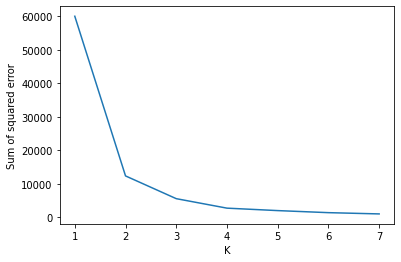

In [4]:
k_rng = range(1,8)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(segments)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [5]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4)

y_predicted = clusterer.fit_predict(segments)


In [6]:
plotX = pd.DataFrame(np.array(segments))
plotX['Cluster'] = y_predicted
# plotX.columns = ekg_data_df.columns
#Rename plotX's columns since it was briefly converted to an np.array above
#plotX.columns = ekg_data_df.columns

In [7]:
from sklearn.decomposition import PCA



In [8]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [9]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [10]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX["dummy"] = 0
plotX

,0,1,2,3,4,5,6,7,8,9,...,18,19,Cluster,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
0,0.007636,0.012708,0.018608,0.024860,0.030845,0.036033,0.040184,0.043423,0.046193,0.049092,...,0.087436,0.089929,0,0.234018,0.234018,0.113178,0.234018,0.113178,0.003859,0
1,0.093119,0.097273,0.102292,0.107771,0.113165,0.117999,0.122047,0.125428,0.128563,0.132017,...,0.176377,0.179382,0,0.613515,0.613515,0.121409,0.613515,0.121409,-0.002544,0
2,0.183025,0.187594,0.193010,0.198855,0.204542,0.209545,0.213604,0.216822,0.219623,0.222590,...,0.262715,0.265644,0,1.012822,1.012822,0.113882,1.012822,0.113882,0.000788,0
3,0.269195,0.273602,0.278751,0.284226,0.289468,0.294000,0.297634,0.300547,0.303212,0.306229,...,0.352238,0.356062,0,1.396433,1.396433,0.119023,1.396433,0.119023,-0.006185,0
4,0.360541,0.365897,0.371990,0.378365,0.384422,0.389652,0.393831,0.397118,0.399997,0.403100,...,0.449573,0.453769,0,1.825105,1.825105,0.125361,1.825105,0.125361,-0.002800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,-0.102957,-0.104675,-0.106696,-0.109250,-0.112299,-0.115537,-0.118499,-0.120739,-0.122013,-0.122384,...,-0.134944,-0.136017,0,-0.540017,-0.540017,-0.040016,-0.540017,-0.040016,-0.002429,0
2995,-0.136808,-0.137794,-0.139416,-0.141901,-0.145164,-0.148830,-0.152349,-0.155186,-0.157013,-0.157821,...,-0.164832,-0.164144,0,-0.689803,-0.689803,-0.037383,-0.689803,-0.037383,-0.009398,0
2996,-0.162931,-0.161710,-0.160995,-0.161121,-0.162118,-0.163709,-0.165412,-0.166719,-0.167295,-0.167084,...,-0.164508,-0.162147,0,-0.735936,-0.735936,-0.002909,-0.735936,-0.002909,-0.004858,0
2997,-0.159238,-0.156369,-0.154122,-0.152880,-0.152726,-0.153441,-0.154624,-0.155866,-0.156921,-0.157810,...,-0.186043,-0.187333,0,-0.734479,-0.734479,-0.044119,-0.734479,-0.044119,0.024345,0


In [11]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]

In [12]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [13]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(100, 105, 20, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)
#py.offline.plot(fig, filename='gauge-meter-chart.html')

In [14]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 250, 3, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)
#py.offline.plot(fig, filename='gauge-meter-chart.html')

In [15]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 250, 3, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)
#py.offline.plot(fig, filename='gauge-meter-chart.html')